In [193]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
import joblib
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pdata = pd.read_csv(r'F:\Code\Data\TrainingData\online_shoppers_intention\online_shoppers_intention.csv')

In [10]:
print(pdata.info())
# 按照Administrative分组
pgd = pdata.groupby('Administrative')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [15]:
print(pdata.head(3))

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                      0.0   
1                     0.0               2                     64.0   
2                     0.0               1                      0.0   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0          0.2        0.2         0.0         0.0   Feb                 1   
1          0.0        0.1         0.0         0.0   Feb                 2   
2          0.2        0.2         0.0         0.0   Feb                 4   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1     

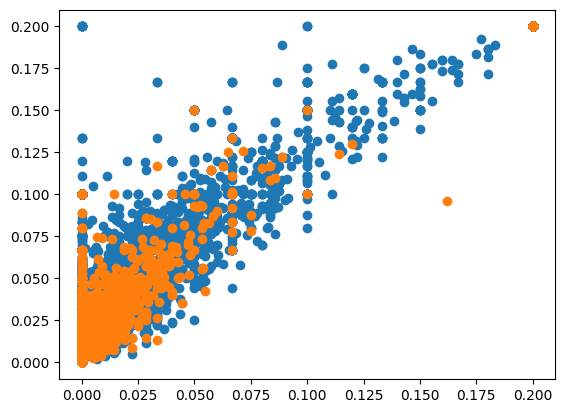

In [99]:
toData = list()
countnum = 0
for i,j in pgd[['BounceRates','ExitRates']]:
    if countnum>1:
        break
    countnum+=1
    plt.scatter(np.asarray(j['BounceRates'].values),np.asarray(j['ExitRates'].values))

In [208]:
# 抽取符合标准的数据
titlename = [i for i in pdata.columns]
basicdata = list()
redata = list()
for i in titlename:
    if pdata[i].dtype in (np.dtype('int64'),np.dtype('float64')):
        basicdata.append(i)
    elif(pdata[i].dtype == np.dtype('bool')):
        redata.append(i)

In [101]:
indata = pdata[[i for i in basicdata]].values
print(indata)
indata = np.asarray(indata)
print(indata.shape)

[[ 0.  0.  0. ...  1.  1.  1.]
 [ 0.  0.  0. ...  2.  1.  2.]
 [ 0.  0.  0. ...  1.  9.  3.]
 ...
 [ 0.  0.  0. ...  2.  1. 13.]
 [ 4. 75.  0. ...  2.  3. 11.]
 [ 0.  0.  0. ...  2.  1.  2.]]
(12330, 14)


In [209]:
toData = list()
countnum = 1
X = 0
Y = 0
for i,j in pgd[[i for i in basicdata]]:
    if countnum == 1:
        X = pd.DataFrame(np.asarray(j.values))
        Y = pd.DataFrame(np.ones((len(X)))*countnum)
        countnum+=1
        continue
    countnum+=1
    xdata = np.asarray(j.values)
    X = pd.concat([X,pd.DataFrame(xdata)],axis=0,ignore_index=True)
    Y = pd.concat([Y,pd.DataFrame(np.ones((len(xdata))))*countnum],axis=0,ignore_index=True)
    print(X.shape,Y.shape)
Y = np.ravel(Y)

(7122, 14) (7122, 1)
(8236, 14) (8236, 1)
(9151, 14) (9151, 1)
(9916, 14) (9916, 1)
(10491, 14) (10491, 1)
(10923, 14) (10923, 1)
(11261, 14) (11261, 1)
(11548, 14) (11548, 1)
(11773, 14) (11773, 1)
(11926, 14) (11926, 1)
(12031, 14) (12031, 1)
(12117, 14) (12117, 1)
(12173, 14) (12173, 1)
(12217, 14) (12217, 1)
(12255, 14) (12255, 1)
(12279, 14) (12279, 1)
(12295, 14) (12295, 1)
(12307, 14) (12307, 1)
(12313, 14) (12313, 1)
(12315, 14) (12315, 1)
(12317, 14) (12317, 1)
(12321, 14) (12321, 1)
(12324, 14) (12324, 1)
(12328, 14) (12328, 1)
(12329, 14) (12329, 1)
(12330, 14) (12330, 1)


In [210]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=0)

In [215]:
TXKnn = KNeighborsClassifier(n_neighbors=24,weights='uniform',algorithm='kd_tree')
TXKnn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=24)

In [216]:
train_predict = TXKnn.predict(x_train)# 预测结果
test_predict = TXKnn.predict(x_test)# 预测结果
print(f'测试:{TXKnn.score(x_test,y_test)}')
print(f'预测:{TXKnn.score(x_train,y_train)}')
print(accuracy_score(y_true=y_train,y_pred=train_predict))

测试:0.5227088402270884
预测:0.5726885644768857
0.5726885644768857
